# Fashion MNIST classification

## Libraries

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Dataset loading

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
class_names = ['T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot']

# Visualizations

In [6]:
def plot_random_images(dataset, labels):
    
    # draw sample
    n = dataset.shape[0]
    idxs = random.choices(range(0,n), k=25)
    images = dataset[idxs]
    classes = labels[idxs]
    # plot
    fig = plt.figure(figsize=(15, 15))
    columns = 5
    rows = 5
    for i in range(1, columns*rows+1):
        fig.add_subplot(rows, columns, i)
        plt.xticks([])
        plt.yticks([])
        plt.title(class_names[classes[i-1]] )
        plt.imshow(images[i-1] )
    plt.show()

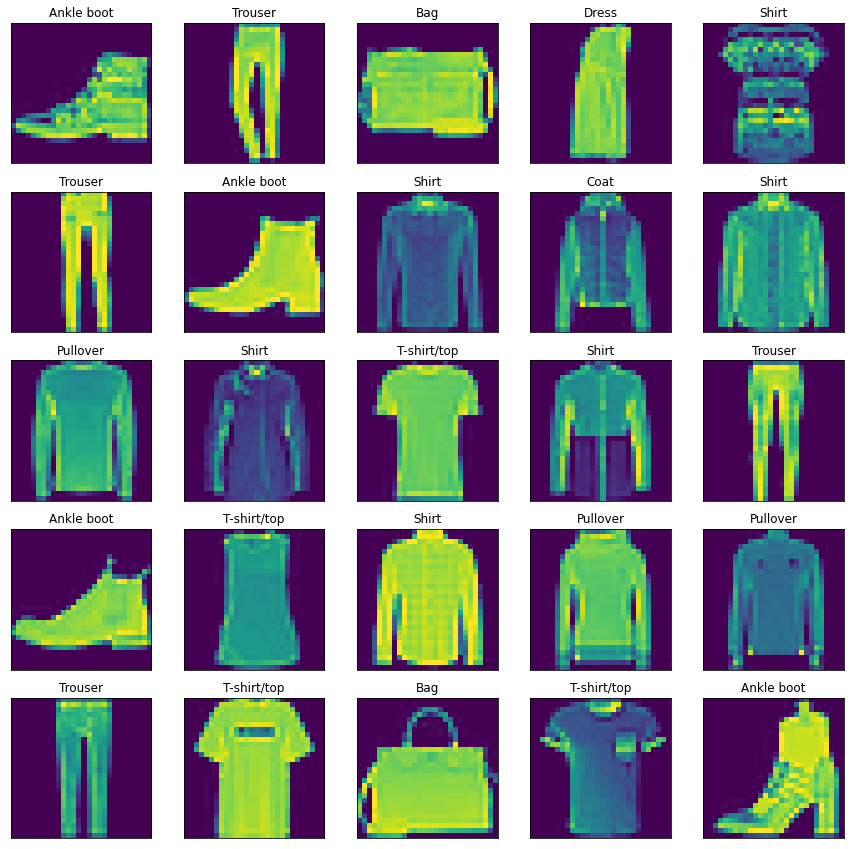

In [7]:
plot_random_images(x_train, y_train)

## Scaling

In [8]:
x_train = x_train/255
x_test = x_test/255

## ANN with Keras

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
callback = EarlyStopping(monitor='loss', patience=4)

In [14]:
result = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=20,
                   batch_size=16, 
                   callbacks=[callback],
                   verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 10s - loss: 0.4791 - accuracy: 0.8255 - val_loss: 0.4230 - val_accuracy: 0.8508
Epoch 2/20
60000/60000 - 19s - loss: 0.3681 - accuracy: 0.8658 - val_loss: 0.3778 - val_accuracy: 0.8622
Epoch 3/20
60000/60000 - 15s - loss: 0.3280 - accuracy: 0.8787 - val_loss: 0.3798 - val_accuracy: 0.8636
Epoch 4/20
60000/60000 - 15s - loss: 0.3060 - accuracy: 0.8877 - val_loss: 0.3594 - val_accuracy: 0.8716
Epoch 5/20
60000/60000 - 16s - loss: 0.2869 - accuracy: 0.8934 - val_loss: 0.3602 - val_accuracy: 0.8771
Epoch 6/20
60000/60000 - 15s - loss: 0.2731 - accuracy: 0.8974 - val_loss: 0.3483 - val_accuracy: 0.8707
Epoch 7/20
60000/60000 - 11s - loss: 0.2626 - accuracy: 0.9018 - val_loss: 0.3697 - val_accuracy: 0.8721
Epoch 8/20
60000/60000 - 12s - loss: 0.2480 - accuracy: 0.9057 - val_loss: 0.3392 - val_accuracy: 0.8824
Epoch 9/20
60000/60000 - 12s - loss: 0.2431 - accuracy: 0.9086 - val_loss: 0.3520 - val_accuracy: 0.8796
Epoch

In [15]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

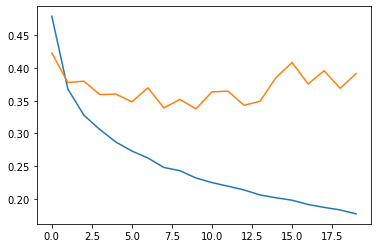

In [16]:
plt.plot(result.history['loss'], label = 'loss')
plt.plot(result.history['val_loss'], label = 'val_loss')

In [17]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3914 - accuracy: 0.8854


[0.3914222898602486, 0.8854]

In [18]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(10000, 10)


In [19]:
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

(10000,)


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(y_test, y_pred))

[[875   2   6  27   3   1  81   0   5   0]
 [  2 977   0  14   4   0   2   0   1   0]
 [ 23   1 686  15 201   0  74   0   0   0]
 [ 16   4  11 916  28   0  21   1   3   0]
 [  0   1  47  40 857   0  52   0   3   0]
 [  0   0   0   1   0 954   0  28   0  17]
 [120   4  58  42  92   0 676   0   8   0]
 [  0   0   0   0   0   4   0 967   0  29]
 [  5   1   0   5   3   4   4   2 975   1]
 [  1   0   0   0   0   5   0  23   0 971]]


## CNN with Keras

In [23]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(254, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 254)              

In [29]:
callback = EarlyStopping(monitor='loss', patience=4)

In [30]:
result = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=20,
                   batch_size=16, 
                   callbacks=[callback],
                   verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 67s - loss: 0.4157 - accuracy: 0.8486 - val_loss: 0.3461 - val_accuracy: 0.8701
Epoch 2/20
60000/60000 - 68s - loss: 0.2927 - accuracy: 0.8918 - val_loss: 0.2837 - val_accuracy: 0.8973
Epoch 3/20
60000/60000 - 71s - loss: 0.2475 - accuracy: 0.9100 - val_loss: 0.2731 - val_accuracy: 0.9006
Epoch 4/20
60000/60000 - 70s - loss: 0.2130 - accuracy: 0.9208 - val_loss: 0.2740 - val_accuracy: 0.9049
Epoch 5/20
60000/60000 - 74s - loss: 0.1885 - accuracy: 0.9299 - val_loss: 0.2779 - val_accuracy: 0.9020
Epoch 6/20
60000/60000 - 75s - loss: 0.1678 - accuracy: 0.9367 - val_loss: 0.2737 - val_accuracy: 0.9083
Epoch 7/20
60000/60000 - 70s - loss: 0.1484 - accuracy: 0.9441 - val_loss: 0.3005 - val_accuracy: 0.9070
Epoch 8/20
60000/60000 - 70s - loss: 0.1384 - accuracy: 0.9478 - val_loss: 0.3073 - val_accuracy: 0.9102
Epoch 9/20
60000/60000 - 82s - loss: 0.1260 - accuracy: 0.9527 - val_loss: 0.3322 - val_accuracy: 0.9063
Epoch

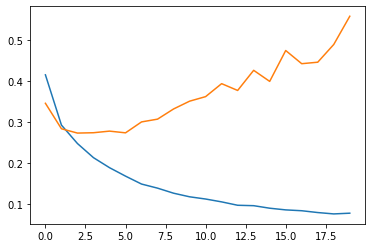

In [31]:
plt.plot(result.history['loss'], label = 'loss')
plt.plot(result.history['val_loss'], label = 'val_loss')

In [32]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 138us/sample - loss: 0.5591 - accuracy: 0.9018


[0.559087117907405, 0.9018]

In [33]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(10000, 10)


In [34]:
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

(10000,)


In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[870   0  24  15   3   0  82   0   6   0]
 [  1 982   0  15   0   0   0   0   2   0]
 [ 22   0 879   7  37   0  53   0   2   0]
 [ 25   5  12 906  25   1  24   0   1   1]
 [  5   0 116  24 802   0  51   0   2   0]
 [  1   0   0   1   0 977   0  11   0  10]
 [128   1  89  21  45   0 705   0  11   0]
 [  0   0   0   0   0  13   0 954   0  33]
 [  5   1   2   5   2   4   6   4 970   1]
 [  0   0   0   0   0   4   1  22   0 973]]
